# PROBLEM STATEMENT

The Goal of project is to predict whether the Customer will churn or not
and To find the which features will support the customer churn 


# DATA DESCRIPTION

##### HYPOTHESIS GENERATION:

###### IMPORTING BASIC PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings("ignore")

##### STEPS INVOLVED IN THIS PROJECT

###### 1.DATA LOADING

In [2]:
churn_df_x_train=pd.read_csv('X_train.csv')
churn_df_y_train=pd.read_csv('y_train.csv')

In [3]:
#lets add to form single dataframe

churn_df=pd.merge(churn_df_x_train,churn_df_y_train,on='CustomerId')

In [4]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73,0
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29,0
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0


###### 1.1 SHAPE OF DATASET

In [5]:
churn_df.shape

print("The number of rows in the dataset are: {} ".format(churn_df.shape[0]))
print("The number of columns in the dataset are: {} ".format(churn_df.shape[1]))

The number of rows in the dataset are: 6499 
The number of columns in the dataset are: 13 


###### 1.2 DATA TYPES IN DATASET

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 0 to 6498
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       6499 non-null   int64  
 1   Surname          6499 non-null   object 
 2   CreditScore      6499 non-null   int64  
 3   Geography        6499 non-null   object 
 4   Gender           6499 non-null   object 
 5   Age              6499 non-null   int64  
 6   Tenure           6499 non-null   int64  
 7   Balance          6499 non-null   float64
 8   NumOfProducts    6499 non-null   int64  
 9   HasCrCard        6499 non-null   int64  
 10  IsActiveMember   6499 non-null   int64  
 11  EstimatedSalary  6499 non-null   float64
 12  Exited           6499 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 710.8+ KB


###### 1.3 CHECK THE NULL VALUES IN DATA

In [7]:
churn_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values in data

###### 1.4 CHECK OF DUPLICATES IN THE DATA

In [8]:
churn_df.duplicated().sum()

0

No duplicates in the data

###### 1.5 SUMMARY OF DATA THROUGH STASTICS

In [9]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6.499000e+03,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000,6499.000000
mean,1.569157e+07,650.396830,38.957070,5.041545,76836.581068,1.519772,0.708878,0.514387,100346.564524,0.203724
std,7.187584e+04,96.618957,10.502803,2.891779,62407.570894,0.578975,0.454314,0.499831,57944.655305,0.402797
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562949e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50907.565000,0.000000
50%,1.569181e+07,651.000000,37.000000,5.000000,97560.160000,1.000000,1.000000,1.000000,100496.840000,0.000000
75%,1.575358e+07,718.000000,44.000000,8.000000,127844.690000,2.000000,1.000000,1.000000,150480.155000,0.000000
max,1.581566e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000,1.000000


Observations:
    Highest Tenure is 10years and lowest is 0
    Some Customers has balance zero

# 2 DATA  PREPARATION

In [10]:
#Check any strange values in the dataset

#segregate the numerical and categorical features
numerical_features=churn_df.select_dtypes(exclude='O').columns
caterigorical_features=churn_df.select_dtypes(include='O').columns

In [11]:
#check the strange values in the categorical varibles
for i in caterigorical_features:
    print(churn_df[i].value_counts(dropna=False))
    print("="*35)

Brown         21
Scott         20
Shih          20
Martin        19
Smith         19
              ..
Steiner        1
Descoteaux     1
Sozonov        1
Jefferson      1
Gilleland      1
Name: Surname, Length: 2289, dtype: int64
France     3227
Germany    1650
Spain      1622
Name: Geography, dtype: int64
Male      3485
Female    2861
 male       80
female      73
Name: Gender, dtype: int64


In [12]:
#The Gender 4 types categories with same meaning
churn_df['Gender']=churn_df['Gender'].replace(to_replace=' male',value='Male')


In [13]:
churn_df['Gender']=churn_df['Gender'].replace(to_replace='female',value='Female')

### 3.EDA(EXPLOROTARY DATA ANALYSIS)

In [14]:
#segregate numerical and categorical features
numerical_features
caterigorical_features

print("The numerical_features are :{}".format(list(numerical_features)))
print("The categorical_features are: {}".format(list(caterigorical_features)))

The numerical_features are :['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
The categorical_features are: ['Surname', 'Geography', 'Gender']


##### Univarate analysis of Target Variable

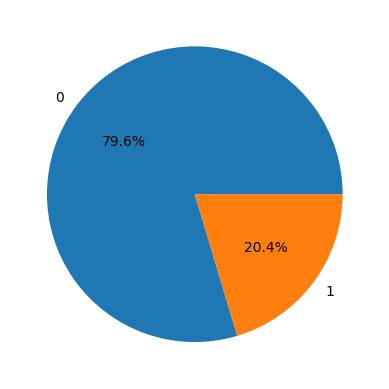

In [15]:
plt.pie(churn_df['Exited'].value_counts(),autopct='%1.1f%%',labels=churn_df['Exited'].value_counts().index)
plt.show()

observation:
    79.6% didnt churned and on 20.4% churned

#### 3.1 CATEGORICAL FEATURES

###### 3.1.1 UNIVARAITE ANALYSIS  AND  BIVARAITE ANALYSIS

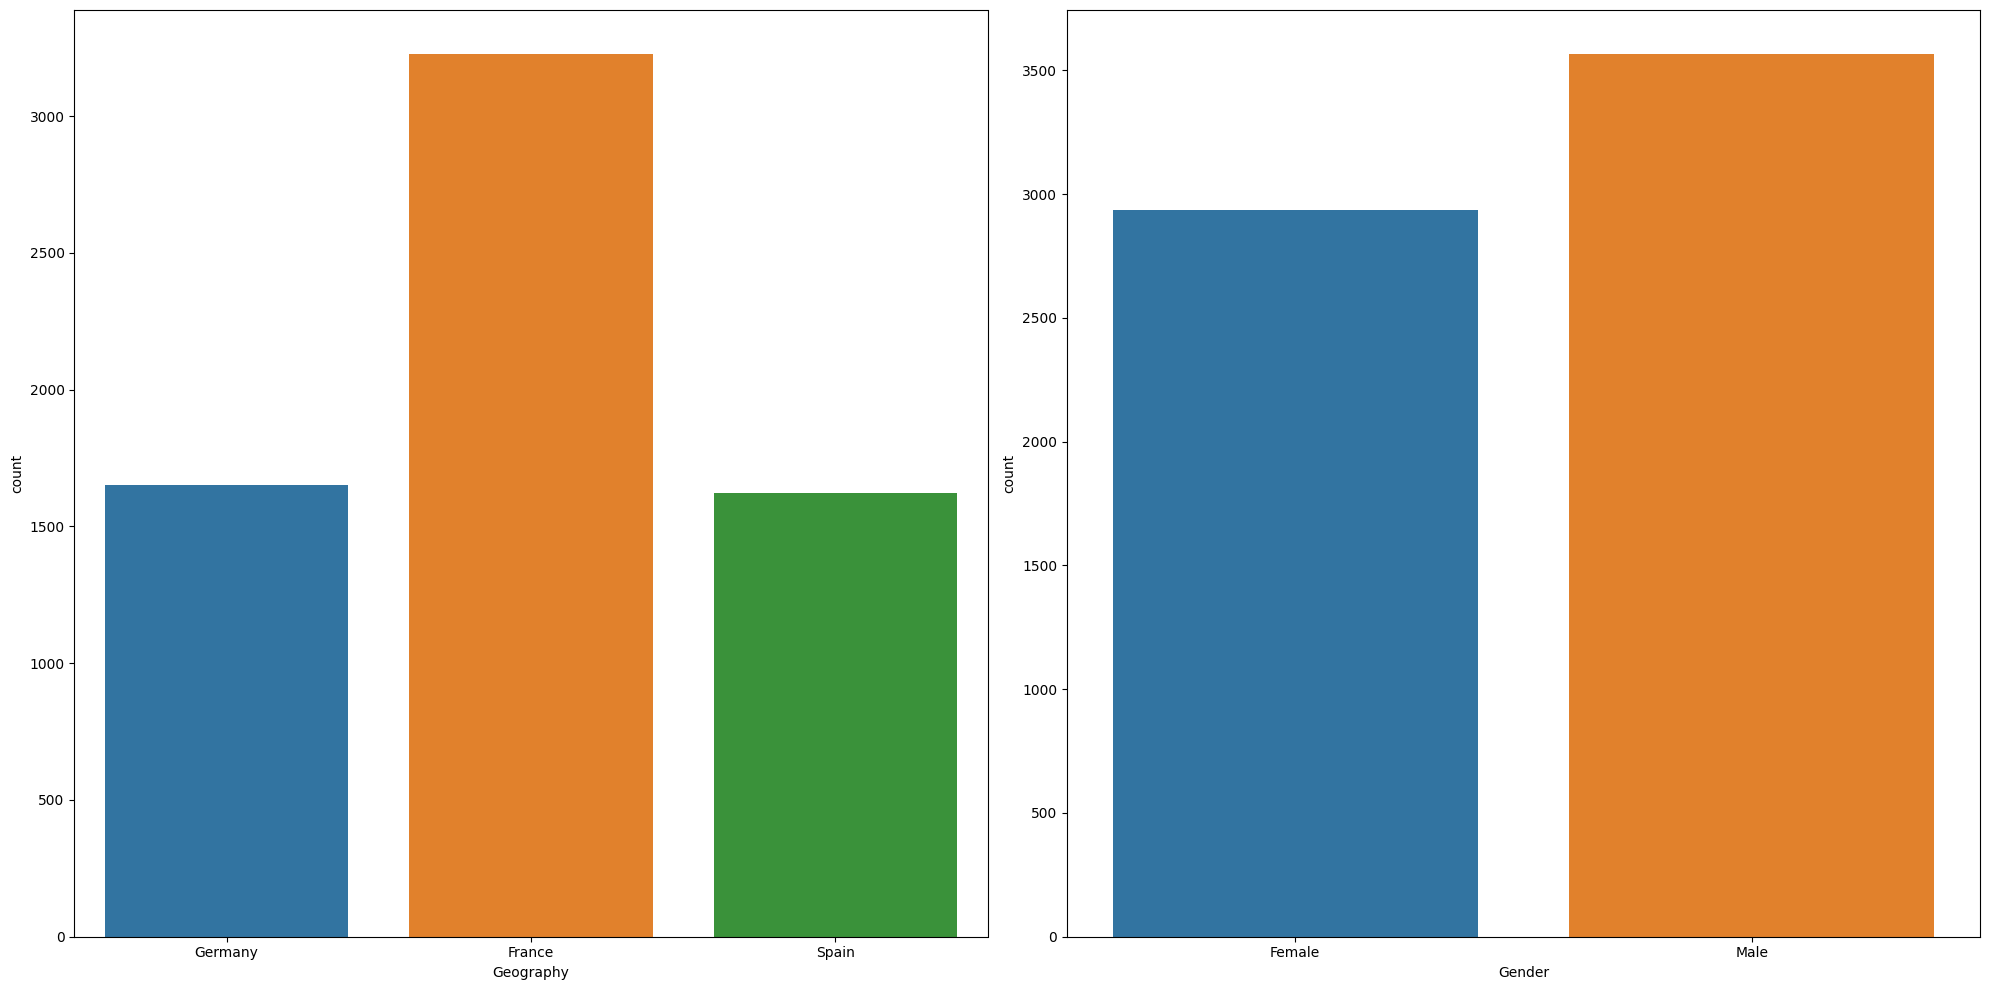

In [16]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(x='Geography',data=churn_df)
plt.subplot(122)
sns.countplot(x='Gender',data=churn_df)
plt.tight_layout()
plt.show()


Observation:
    Most of Customers are from france country
    Most Customer are male customer

###### BIVARAITE ANALYSIS (CATEGORICAL VARIABLES VS TARGET VARIABLE)

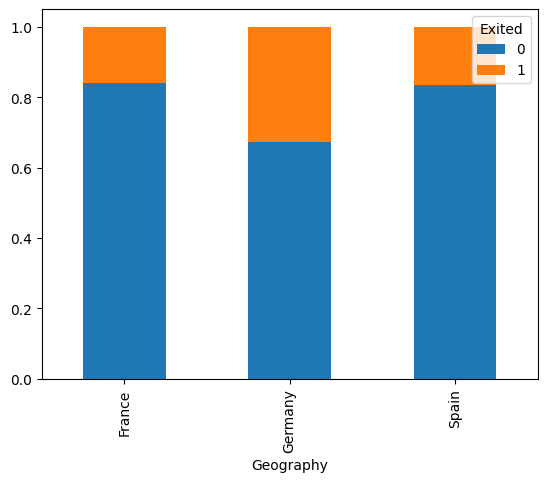

In [17]:
#Gegrophy vs Exited
geography=pd.crosstab(churn_df['Geography'],churn_df['Exited'])
geography.div(geography.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()



observartion:
    customers of Germany are churned

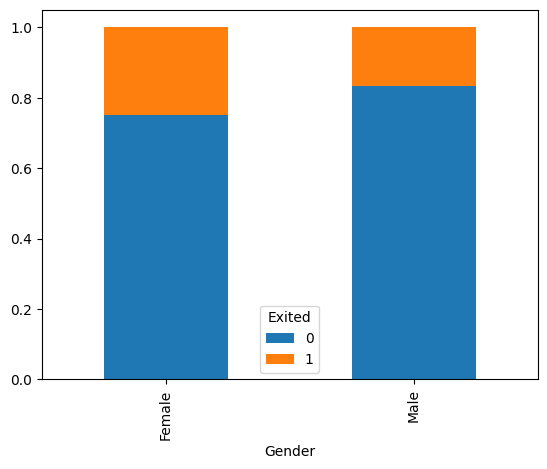

In [18]:
#Gender vs Target variables
gender=pd.crosstab(churn_df['Gender'],churn_df['Exited'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

observartion:
    Females are more churned than male

##### 3.1.1.2 DISTURBUTION OF GENDER AND HOW GENDER IS IS EFFECTED BY EXISTED(TARGET VARIABLE)

## 3.2 NUMERICAL_VARIBLES

In [19]:
numerical_features

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [20]:
#segregate numerical features 
Discreate_numerical_features=[features for features in numerical_features if len(churn_df[features].value_counts())<5]


In [21]:
Discreate_numerical_features

['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [22]:
Continous_numerical_features=[features for features in numerical_features if features not in Discreate_numerical_features]

In [23]:
Continous_numerical_features

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

## 3.2.1 Discreate_numerical_features

#### UNIVARIATE AND BIVARIATE ANLAYSIS

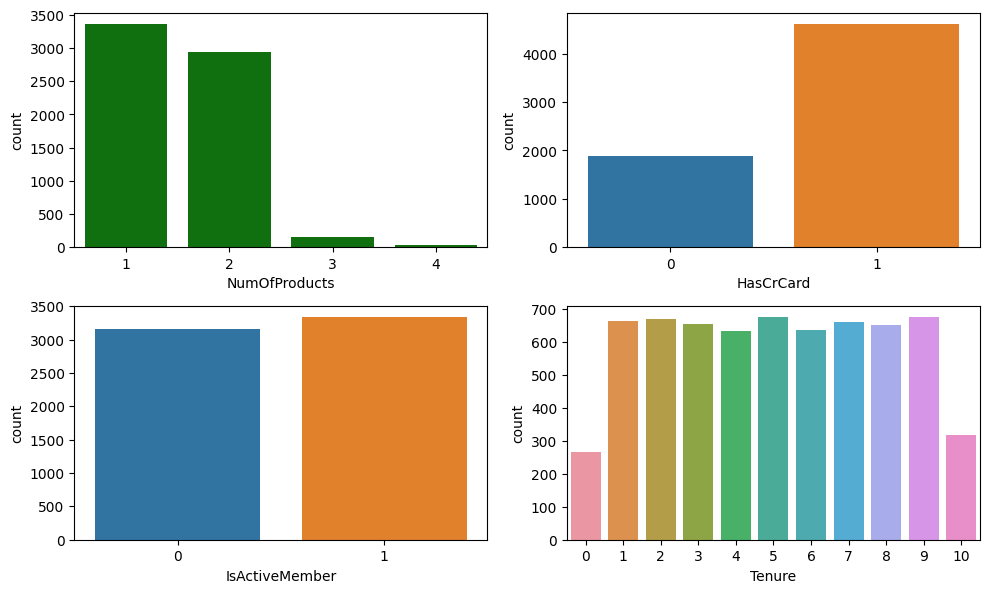

In [24]:
fig,ax=plt.subplots(figsize=(10,6))

#NumOfProducts
plt.subplot(221)
sns.countplot(x='NumOfProducts',color='green',data=churn_df)


#HasCrCard
plt.subplot(222)
sns.countplot(x='HasCrCard',data=churn_df)


#IsActiveMember
plt.subplot(223)
sns.countplot(x='IsActiveMember',data=churn_df)

#Tenure
plt.subplot(224)
sns.countplot(x='Tenure',data=churn_df)



plt.tight_layout()
plt.show()

#### BIVARIATE ANALYSIS(Discreate numerical variables vs Targer variables)
    

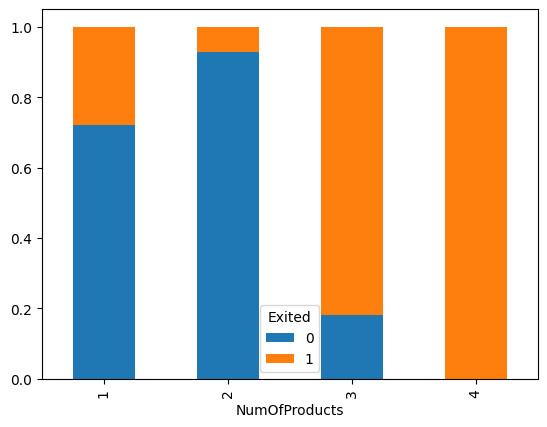

In [25]:
#Numofprodducts vs Exited variable
Numofproducts=pd.crosstab(churn_df['NumOfProducts'],churn_df['Exited'])
Numofproducts.div(Numofproducts.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    Customer who have got 4 products from the bank has churned more

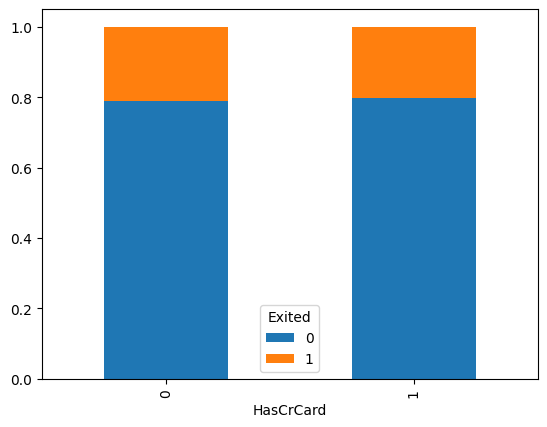

In [26]:
#HasCrCard vs Exited varibale
HasCrCard=pd.crosstab(churn_df['HasCrCard'],churn_df['Exited'])
HasCrCard.div(HasCrCard.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

observation:
    Customer who have card and who doesnt card doesnt make any difference

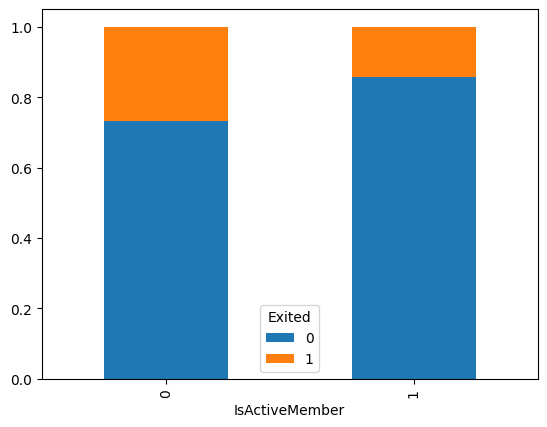

In [27]:
#IsActiveMember vs Exited varibale
IsActiveMember=pd.crosstab(churn_df['IsActiveMember'],churn_df['Exited'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    Customer who are not activemember churned more

###### Tenure

In [28]:
bins=[0,3,6,10]
groups=['low','Averge','High']
churn_df['Tenure_bins']=pd.cut(churn_df['Tenure'],bins=bins,labels=groups)

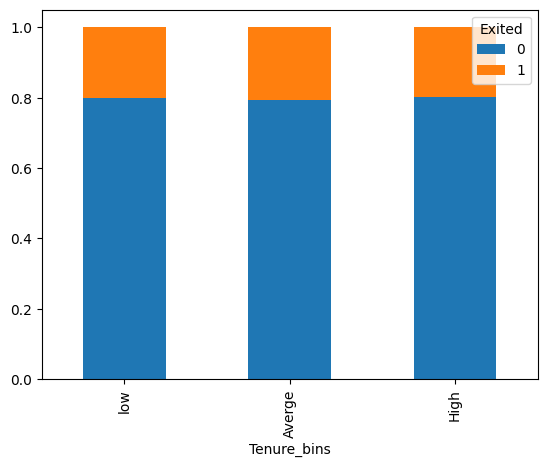

In [29]:
#Tenure vs Exited varibale
Tenure_bins=pd.crosstab(churn_df['Tenure_bins'],churn_df['Exited'])
Tenure_bins.div(Tenure_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    Tenure doesnt make any differnce

### 3.2.2 Continous_numerical_features

###### UNIVARIATE AND BIVARAINATE ANALYSIS

In [30]:
Continous_numerical_features

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

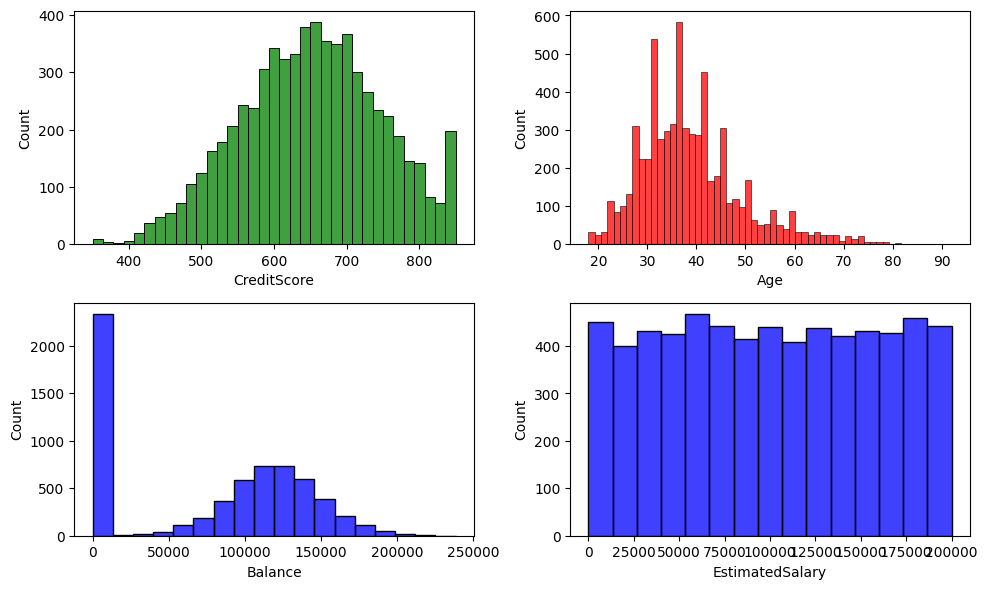

In [31]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
#CreditScore
sns.histplot(x='CreditScore',color='green',ax=ax[0,0],data=churn_df)
#Age
sns.histplot(x='Age',color='red',ax=ax[0,1],data=churn_df)
#Balance
sns.histplot(x='Balance',color='blue',ax=ax[1,0],data=churn_df)
#EstimatedSalary
sns.histplot(x='EstimatedSalary',color='blue',ax=ax[1,1],data=churn_df,bins=15)

plt.tight_layout()
plt.show()

 Observation:
 Age and Credit Score which left sckewed and left sckewed respectively
    
    

##### AGE

In [32]:
bins=[20,30,60,70]
groups=["low","medium","High"]
churn_df['Age_bins']=pd.cut(churn_df['Age'],bins=bins,labels=groups)

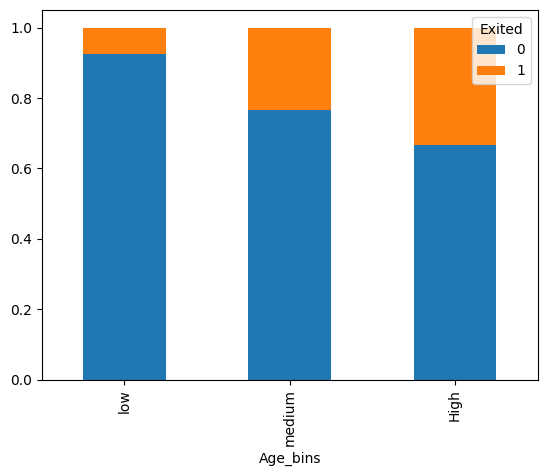

In [33]:
#Age vs Exited varibale
Age_bins=pd.crosstab(churn_df['Age_bins'],churn_df['Exited'])
Age_bins.div(Age_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    High age gets more churned and the hypothesis was sucessfully executed

#### CreditScore

In [34]:
bins=[400,600,700,850]
groups=["low","medium","High"]
churn_df['CreditScore_bins']=pd.cut(churn_df['CreditScore'],bins=bins,labels=groups)

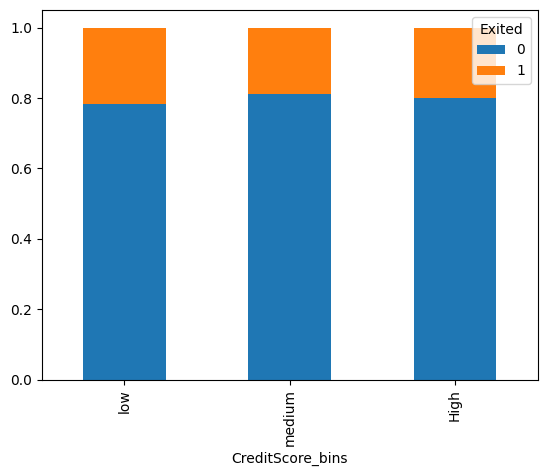

In [35]:
#CreditScore vs Exited varibale
CreditScore_bins=pd.crosstab(churn_df['CreditScore_bins'],churn_df['Exited'])
CreditScore_bins.div(CreditScore_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    No differnce showed to differnt stages of credit score and it is agaist hypothesis 

#### Balance

lets check the hypothesis
Higher balance have chance of less churned

In [36]:
bins=[0,100000,150000,2500000]
groups=["low","medium","High"]
churn_df['Balance_bins']=pd.cut(churn_df['Balance'],bins=bins,labels=groups)

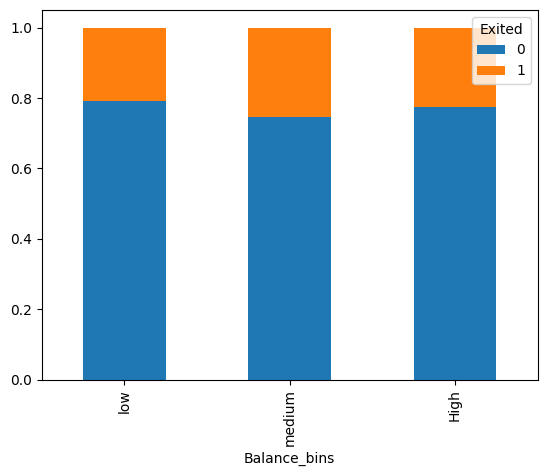

In [37]:
#Balance vs Exited varibale
Balance_bins=pd.crosstab(churn_df['Balance_bins'],churn_df['Exited'])
Balance_bins.div(Balance_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    Balance does effect Exited features (it does make any differnce for churning) and it agaist the hypotheis

##### EstimatedSalary

Higher the income amount will saved in bank less chance churned

In [38]:
bins=[25000,75000,100000,190000]
groups=['low','Averge','High']
churn_df['EstimatedSalary_bins']=pd.cut(churn_df['EstimatedSalary'],bins=bins,labels=groups)

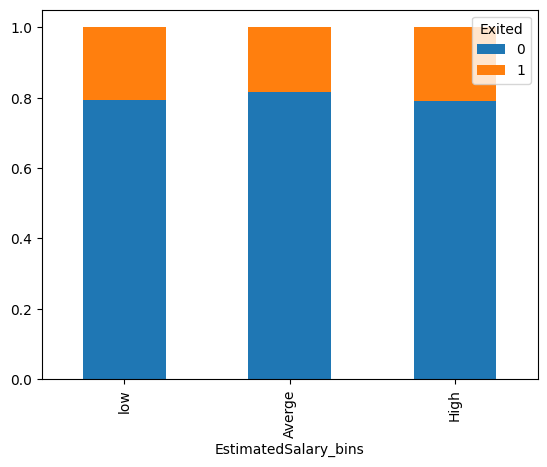

In [39]:
EstimatedSalary_bins=pd.crosstab(churn_df['EstimatedSalary_bins'],churn_df['Exited'])
EstimatedSalary_bins.div(EstimatedSalary_bins.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

Observation:
    Estimation salary doesnt make any difference and it agaist the hypothesis generation

In [40]:
churn_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Tenure_bins,Age_bins,CreditScore_bins,Balance_bins,EstimatedSalary_bins
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0,High,medium,High,low,High
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0,High,medium,High,High,low
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73,0,Averge,medium,low,medium,low
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29,0,low,medium,High,NaN,High
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0,low,medium,High,medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,15702806,Martin,696,Spain,Male,24,9,0.00,1,0,0,10883.52,0,High,low,medium,NaN,NaN
6495,15674179,Vorobyova,513,Germany,Male,34,7,60515.13,1,0,0,124571.09,0,High,medium,low,low,High
6496,15790204,Myers,663,Spain,Female,22,9,0.00,1,1,0,29135.89,1,High,low,medium,NaN,low
6497,15690772,Hughes,635,Spain,Female,48,2,0.00,2,1,1,136551.25,0,low,medium,medium,NaN,High


In [41]:
churn_df=churn_df.drop(['Tenure_bins','Age_bins','CreditScore_bins','Balance_bins','EstimatedSalary_bins'],axis=1)

#### 3.2.2.1 Correlation 

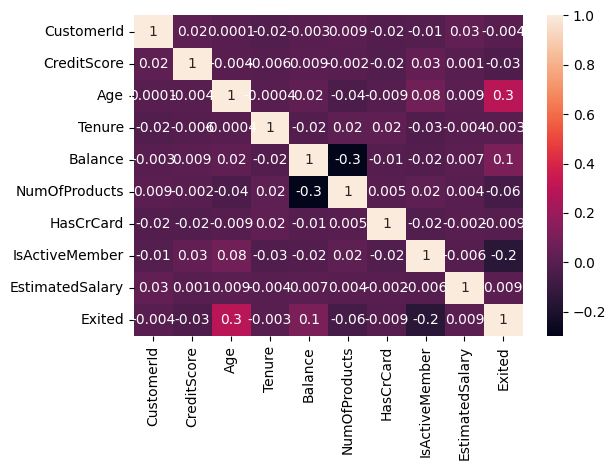

In [42]:
matrix=churn_df.corr()
sns.heatmap(matrix,annot=True,fmt='.1g')
plt.tight_layout()

###### 3.2.1.2 OUTLLIERS  TREATMENT

In [43]:
Continous_numerical_features

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

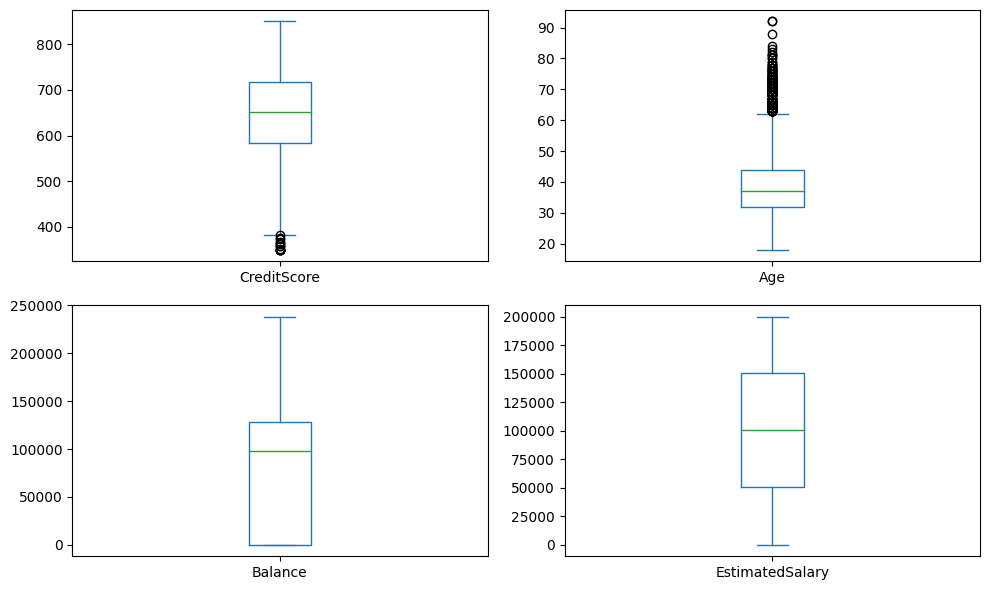

In [44]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
#CreditScore
plt.subplot(221)
churn_df['CreditScore'].plot.box()
#Age
plt.subplot(222)
churn_df['Age'].plot.box()
#Balance
plt.subplot(223)
churn_df['Balance'].plot.box()
#EstimatedSalary
plt.subplot(224)
churn_df['EstimatedSalary'].plot.box()
plt.tight_layout()
plt.show()



Observation:
    Age have more outliers

In [45]:
def treatment_outlier(data):
    q1=np.quantile(data,0.25)
    q3=np.quantile(data,0.75)
    iqr=q3-q1
    lower_bond=q1-1.5*iqr
    upper_bond=q3+1.5*iqr
    return lower_bond,upper_bond

In [46]:
lower_bond,upper_bond=treatment_outlier(churn_df['Age'])

In [47]:
trimmed_data=churn_df[(churn_df['Age']>lower_bond) & (churn_df['Age']<upper_bond)]

# Conclusion:
    1.Customer are less active more churned
    2.Age will effect are  more churned
    3.Germany Customer are Exited churned

##### Checking Targer variable is balance or impbalance

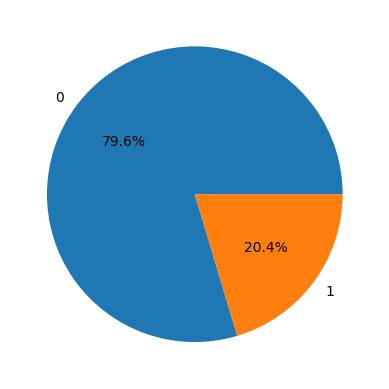

In [48]:
plt.pie(churn_df['Exited'].value_counts(),autopct='%1.1f%%',labels=churn_df['Exited'].value_counts().index)
plt.show()

Observation:
    Most customer are non-exited customer with 79.6%
    Less Customer are less exited with only 20.4%
    which dataset is imbalance

In [49]:
churn_df.drop(['CustomerId','Surname'],axis=1,inplace=True)


##### Feature Engineering

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [51]:
churn_df['Gender']=churn_df['Gender'].map({'Male':1,'Female':0})
churn_df['Geography']=churn_df['Geography'].map({'France':1,'Germany':2,'Spain':3})

In [52]:
x=churn_df.drop('Exited',axis=1)
y=churn_df['Exited']

In [53]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,791,2,0,35,7,52436.20,1,1,0,161051.75
1,705,2,1,42,8,166685.92,2,1,1,55313.51
2,543,1,0,31,4,138317.94,1,0,0,61843.73
3,709,1,0,32,2,0.00,2,0,0,109681.29
4,714,2,0,36,1,101609.01,2,1,1,447.73


In [54]:
x['Geography'].value_counts()

1    3227
2    1650
3    1622
Name: Geography, dtype: int64

In [55]:
cat_features=x.select_dtypes(include='O').columns
num_features=x.select_dtypes(exclude='O').columns

In [56]:
#building pipeline

num_pip=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="mean")),
    ('scaler',StandardScaler())
])
cat_pip=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent"))
  ])

In [57]:
preprocessor=ColumnTransformer([
    ('num_pip',num_pip,num_features),
    ('cat_pip',cat_pip,cat_features)
])

In [58]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
#transforming the data
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

##### Model Building

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score

In [61]:
models={'logistic_reggresion':LogisticRegression(),
       'Naive_bayes':GaussianNB(),
       'KNeighbors':KNeighborsClassifier(),
       'Decision_tree':DecisionTreeClassifier(),
       'SVC':SVC(),
       'Random_forest':RandomForestClassifier(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'catboostclassifier':CatBoostClassifier(),
       'XGBClassifier':XGBClassifier()}

In [62]:
def evalution_model(true,prediction):
    score=accuracy_score(true,prediction)
    score_f1=f1_score(true,prediction)
    precision=precision_score(true,prediction)
    recall=recall_score(true,prediction)
    matrix=confusion_matrix(true,prediction)
    return score,score_f1,precision,recall,matrix
        

In [63]:
models_list=[]
accu_score=[]
f1score=[]
precisonscore=[]
recallscore=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    #training the model
    model.fit(x_train,y_train)
    
    #prediction:
    y_predict=model.predict(x_test)
    
    score,score_f1,precision,recall,matrix=evalution_model(y_test,y_predict)
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print("Accuracy:",score)
    accu_score.append(score)
    
    print("F1-SCORE:",score_f1)
    f1score.append(score_f1)
    
    print("PRECISION_SCORE: ",precision)
    precisonscore.append(precision)
    
    print("RECALL SCORE :",recall)
    recallscore.append(recall)
    
    
    
    print(matrix)
    print("="*35)

logistic_reggresion
Accuracy: 0.8038461538461539
F1-SCORE: 0.28969359331476324
PRECISION_SCORE:  0.6419753086419753
RECALL SCORE : 0.18705035971223022
[[993  29]
 [226  52]]
Naive_bayes
Accuracy: 0.83
F1-SCORE: 0.4075067024128686
PRECISION_SCORE:  0.8
RECALL SCORE : 0.2733812949640288
[[1003   19]
 [ 202   76]]
KNeighbors
Accuracy: 0.8238461538461539
F1-SCORE: 0.4711316397228637
PRECISION_SCORE:  0.6580645161290323
RECALL SCORE : 0.3669064748201439
[[969  53]
 [176 102]]
Decision_tree
Accuracy: 0.7861538461538462
F1-SCORE: 0.483271375464684
PRECISION_SCORE:  0.5
RECALL SCORE : 0.4676258992805755
[[892 130]
 [148 130]]
SVC
Accuracy: 0.8607692307692307
F1-SCORE: 0.5574572127139364
PRECISION_SCORE:  0.8702290076335878
RECALL SCORE : 0.41007194244604317
[[1005   17]
 [ 164  114]]
Random_forest
Accuracy: 0.8661538461538462
F1-SCORE: 0.6009174311926606
PRECISION_SCORE:  0.8291139240506329
RECALL SCORE : 0.4712230215827338
[[995  27]
 [147 131]]
GradientBoostingClassifier
Accuracy: 0.87153846

154:	learn: 0.3234016	total: 993ms	remaining: 5.41s
155:	learn: 0.3231691	total: 999ms	remaining: 5.41s
156:	learn: 0.3228017	total: 1s	remaining: 5.4s
157:	learn: 0.3226093	total: 1.01s	remaining: 5.39s
158:	learn: 0.3222493	total: 1.02s	remaining: 5.39s
159:	learn: 0.3220017	total: 1.02s	remaining: 5.38s
160:	learn: 0.3218092	total: 1.03s	remaining: 5.36s
161:	learn: 0.3215834	total: 1.03s	remaining: 5.35s
162:	learn: 0.3212593	total: 1.04s	remaining: 5.34s
163:	learn: 0.3210681	total: 1.04s	remaining: 5.32s
164:	learn: 0.3207953	total: 1.05s	remaining: 5.31s
165:	learn: 0.3205557	total: 1.05s	remaining: 5.3s
166:	learn: 0.3204538	total: 1.06s	remaining: 5.28s
167:	learn: 0.3202214	total: 1.06s	remaining: 5.26s
168:	learn: 0.3199999	total: 1.07s	remaining: 5.25s
169:	learn: 0.3198147	total: 1.07s	remaining: 5.24s
170:	learn: 0.3195795	total: 1.08s	remaining: 5.22s
171:	learn: 0.3193788	total: 1.08s	remaining: 5.21s
172:	learn: 0.3191151	total: 1.09s	remaining: 5.2s
173:	learn: 0.3189

313:	learn: 0.2943850	total: 1.8s	remaining: 3.94s
314:	learn: 0.2942270	total: 1.81s	remaining: 3.94s
315:	learn: 0.2941071	total: 1.82s	remaining: 3.93s
316:	learn: 0.2939991	total: 1.82s	remaining: 3.93s
317:	learn: 0.2938896	total: 1.83s	remaining: 3.92s
318:	learn: 0.2938267	total: 1.83s	remaining: 3.91s
319:	learn: 0.2937663	total: 1.84s	remaining: 3.91s
320:	learn: 0.2935320	total: 1.84s	remaining: 3.9s
321:	learn: 0.2934465	total: 1.85s	remaining: 3.89s
322:	learn: 0.2931555	total: 1.85s	remaining: 3.88s
323:	learn: 0.2929850	total: 1.86s	remaining: 3.88s
324:	learn: 0.2928856	total: 1.86s	remaining: 3.87s
325:	learn: 0.2927130	total: 1.87s	remaining: 3.86s
326:	learn: 0.2925557	total: 1.87s	remaining: 3.85s
327:	learn: 0.2924123	total: 1.88s	remaining: 3.85s
328:	learn: 0.2922698	total: 1.88s	remaining: 3.84s
329:	learn: 0.2921698	total: 1.89s	remaining: 3.83s
330:	learn: 0.2920077	total: 1.89s	remaining: 3.83s
331:	learn: 0.2919389	total: 1.9s	remaining: 3.82s
332:	learn: 0.2

473:	learn: 0.2730409	total: 2.61s	remaining: 2.9s
474:	learn: 0.2729309	total: 2.62s	remaining: 2.89s
475:	learn: 0.2728341	total: 2.62s	remaining: 2.89s
476:	learn: 0.2726198	total: 2.63s	remaining: 2.88s
477:	learn: 0.2724908	total: 2.63s	remaining: 2.88s
478:	learn: 0.2723355	total: 2.64s	remaining: 2.87s
479:	learn: 0.2722515	total: 2.65s	remaining: 2.87s
480:	learn: 0.2722028	total: 2.65s	remaining: 2.86s
481:	learn: 0.2720454	total: 2.66s	remaining: 2.85s
482:	learn: 0.2718765	total: 2.66s	remaining: 2.85s
483:	learn: 0.2717886	total: 2.67s	remaining: 2.84s
484:	learn: 0.2716575	total: 2.67s	remaining: 2.84s
485:	learn: 0.2715563	total: 2.68s	remaining: 2.83s
486:	learn: 0.2714039	total: 2.68s	remaining: 2.83s
487:	learn: 0.2712926	total: 2.69s	remaining: 2.82s
488:	learn: 0.2711086	total: 2.69s	remaining: 2.81s
489:	learn: 0.2710308	total: 2.7s	remaining: 2.81s
490:	learn: 0.2708582	total: 2.7s	remaining: 2.8s
491:	learn: 0.2706681	total: 2.71s	remaining: 2.79s
492:	learn: 0.27

671:	learn: 0.2497660	total: 3.63s	remaining: 1.77s
672:	learn: 0.2497029	total: 3.63s	remaining: 1.76s
673:	learn: 0.2495980	total: 3.64s	remaining: 1.76s
674:	learn: 0.2495097	total: 3.64s	remaining: 1.75s
675:	learn: 0.2493940	total: 3.65s	remaining: 1.75s
676:	learn: 0.2493157	total: 3.66s	remaining: 1.74s
677:	learn: 0.2492229	total: 3.66s	remaining: 1.74s
678:	learn: 0.2491322	total: 3.67s	remaining: 1.73s
679:	learn: 0.2490643	total: 3.67s	remaining: 1.73s
680:	learn: 0.2489937	total: 3.67s	remaining: 1.72s
681:	learn: 0.2489185	total: 3.68s	remaining: 1.72s
682:	learn: 0.2487991	total: 3.69s	remaining: 1.71s
683:	learn: 0.2486481	total: 3.69s	remaining: 1.71s
684:	learn: 0.2485305	total: 3.69s	remaining: 1.7s
685:	learn: 0.2483642	total: 3.7s	remaining: 1.69s
686:	learn: 0.2482360	total: 3.71s	remaining: 1.69s
687:	learn: 0.2481534	total: 3.71s	remaining: 1.68s
688:	learn: 0.2480423	total: 3.71s	remaining: 1.68s
689:	learn: 0.2479168	total: 3.72s	remaining: 1.67s
690:	learn: 0.

835:	learn: 0.2340663	total: 4.45s	remaining: 874ms
836:	learn: 0.2339835	total: 4.46s	remaining: 869ms
837:	learn: 0.2338987	total: 4.47s	remaining: 864ms
838:	learn: 0.2338158	total: 4.47s	remaining: 858ms
839:	learn: 0.2337406	total: 4.48s	remaining: 853ms
840:	learn: 0.2336409	total: 4.49s	remaining: 848ms
841:	learn: 0.2335838	total: 4.49s	remaining: 843ms
842:	learn: 0.2334803	total: 4.5s	remaining: 837ms
843:	learn: 0.2333781	total: 4.5s	remaining: 832ms
844:	learn: 0.2333015	total: 4.5s	remaining: 826ms
845:	learn: 0.2332054	total: 4.51s	remaining: 821ms
846:	learn: 0.2331258	total: 4.51s	remaining: 816ms
847:	learn: 0.2329744	total: 4.52s	remaining: 810ms
848:	learn: 0.2328894	total: 4.53s	remaining: 805ms
849:	learn: 0.2327993	total: 4.53s	remaining: 799ms
850:	learn: 0.2327292	total: 4.54s	remaining: 794ms
851:	learn: 0.2326194	total: 4.54s	remaining: 789ms
852:	learn: 0.2325344	total: 4.54s	remaining: 783ms
853:	learn: 0.2324492	total: 4.55s	remaining: 778ms
854:	learn: 0.2

993:	learn: 0.2204717	total: 5.26s	remaining: 31.8ms
994:	learn: 0.2204077	total: 5.27s	remaining: 26.5ms
995:	learn: 0.2203162	total: 5.27s	remaining: 21.2ms
996:	learn: 0.2202301	total: 5.28s	remaining: 15.9ms
997:	learn: 0.2201389	total: 5.29s	remaining: 10.6ms
998:	learn: 0.2199891	total: 5.29s	remaining: 5.3ms
999:	learn: 0.2198997	total: 5.3s	remaining: 0us
catboostclassifier
Accuracy: 0.8707692307692307
F1-SCORE: 0.629955947136564
PRECISION_SCORE:  0.8125
RECALL SCORE : 0.5143884892086331
[[989  33]
 [135 143]]
XGBClassifier
Accuracy: 0.8538461538461538
F1-SCORE: 0.5851528384279475
PRECISION_SCORE:  0.7444444444444445
RECALL SCORE : 0.48201438848920863
[[976  46]
 [144 134]]


In [64]:
model_performance=pd.DataFrame({'MODELS':models_list,"ACCURACY":accu_score,"F1-SCORE":f1score,"PRECISION_SCORE":precisonscore,
                               'RECALL SCORE':recallscore})

In [65]:
model_performance

,MODELS,ACCURACY,F1-SCORE,PRECISION_SCORE,RECALL SCORE
0,logistic_reggresion,0.803846,0.289694,0.641975,0.187050
1,Naive_bayes,0.830000,0.407507,0.800000,0.273381
2,KNeighbors,0.823846,0.471132,0.658065,0.366906
3,Decision_tree,0.786154,0.483271,0.500000,0.467626
4,SVC,0.860769,0.557457,0.870229,0.410072
5,Random_forest,0.866154,0.600917,0.829114,0.471223
6,GradientBoostingClassifier,0.871538,0.619590,0.844720,0.489209
7,catboostclassifier,0.870769,0.629956,0.812500,0.514388
8,XGBClassifier,0.853846,0.585153,0.744444,0.482014


we can see catboost good accuracy and good f1 score

In [66]:
churn_df.to_csv("ABC_BANK.csv")

###### DEALING WITH IMBALANCE DATASET

In [67]:
X=x.copy()
Y=y.copy()

In [69]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_ros,y_os=ros.fit_resample(X,Y)

print("the shape of :",Y.shape)
print("the shape sample of",y_os.shape)

the shape of : (6499,)
the shape sample of (10350,)


In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(x_ros,y_os,random_state=42)

In [79]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [102]:
models_list1=[]
accu_score1=[]
f1score1=[]
precisonscore1=[]
recallscore1=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    #training the model
    model.fit(X_train,Y_train)
    
    #prediction:
    Y_predict=model.predict(X_test)
    
    score,score_f1,precision,recall,matrix=evalution_model(Y_test,Y_predict)
    
    print(list(models.keys())[i])
    models_list1.append(list(models.keys())[i])
    
    print("Accuracy:",score)
    accu_score1.append(score)
    
    print("F1-SCORE:",score_f1)
    f1score1.append(score_f1)
    
    print("PRECISION_SCORE: ",precision)
    precisonscore1.append(precision)
    
    print("RECALL SCORE :",recall)
    recallscore1.append(recall)
    
    
    
    print(matrix)
    print("="*35)

logistic_reggresion
Accuracy: 0.7009273570324575
F1-SCORE: 0.6993006993006994
PRECISION_SCORE:  0.6933744221879815
RECALL SCORE : 0.7053291536050157
[[914 398]
 [376 900]]
Naive_bayes
Accuracy: 0.740340030911901
F1-SCORE: 0.7341772151898733
PRECISION_SCORE:  0.7412140575079872
RECALL SCORE : 0.7272727272727273
[[988 324]
 [348 928]]
KNeighbors
Accuracy: 0.8110510046367851
F1-SCORE: 0.8219876228613031
PRECISION_SCORE:  0.7675050985723997
RECALL SCORE : 0.8847962382445141
[[ 970  342]
 [ 147 1129]]
Decision_tree
Accuracy: 0.8972179289026275
F1-SCORE: 0.9023494860499266
PRECISION_SCORE:  0.8487569060773481
RECALL SCORE : 0.963166144200627
[[1093  219]
 [  47 1229]]
SVC
Accuracy: 0.8010046367851623
F1-SCORE: 0.7965231133939155
PRECISION_SCORE:  0.803187250996016
RECALL SCORE : 0.7899686520376176
[[1065  247]
 [ 268 1008]]
Random_forest
Accuracy: 0.9435857805255023
F1-SCORE: 0.9444444444444445
PRECISION_SCORE:  0.9178994082840237
RECALL SCORE : 0.9725705329153606
[[1201  111]
 [  35 1241]]


149:	learn: 0.4202882	total: 985ms	remaining: 5.58s
150:	learn: 0.4199829	total: 991ms	remaining: 5.57s
151:	learn: 0.4192681	total: 999ms	remaining: 5.57s
152:	learn: 0.4189600	total: 1.01s	remaining: 5.57s
153:	learn: 0.4186424	total: 1.01s	remaining: 5.57s
154:	learn: 0.4184225	total: 1.02s	remaining: 5.58s
155:	learn: 0.4181284	total: 1.03s	remaining: 5.58s
156:	learn: 0.4177489	total: 1.04s	remaining: 5.57s
157:	learn: 0.4175229	total: 1.04s	remaining: 5.56s
158:	learn: 0.4172800	total: 1.05s	remaining: 5.56s
159:	learn: 0.4168645	total: 1.06s	remaining: 5.55s
160:	learn: 0.4162270	total: 1.06s	remaining: 5.54s
161:	learn: 0.4159980	total: 1.07s	remaining: 5.53s
162:	learn: 0.4156970	total: 1.08s	remaining: 5.53s
163:	learn: 0.4152082	total: 1.08s	remaining: 5.52s
164:	learn: 0.4149798	total: 1.09s	remaining: 5.51s
165:	learn: 0.4145307	total: 1.09s	remaining: 5.5s
166:	learn: 0.4141660	total: 1.1s	remaining: 5.49s
167:	learn: 0.4139031	total: 1.11s	remaining: 5.49s
168:	learn: 0.

339:	learn: 0.3636661	total: 2.2s	remaining: 4.26s
340:	learn: 0.3635213	total: 2.2s	remaining: 4.26s
341:	learn: 0.3632365	total: 2.21s	remaining: 4.25s
342:	learn: 0.3630359	total: 2.22s	remaining: 4.25s
343:	learn: 0.3628895	total: 2.22s	remaining: 4.24s
344:	learn: 0.3627195	total: 2.23s	remaining: 4.23s
345:	learn: 0.3623441	total: 2.24s	remaining: 4.23s
346:	learn: 0.3620403	total: 2.25s	remaining: 4.23s
347:	learn: 0.3617757	total: 2.25s	remaining: 4.22s
348:	learn: 0.3615572	total: 2.26s	remaining: 4.21s
349:	learn: 0.3613023	total: 2.26s	remaining: 4.21s
350:	learn: 0.3611404	total: 2.27s	remaining: 4.2s
351:	learn: 0.3608181	total: 2.28s	remaining: 4.19s
352:	learn: 0.3604699	total: 2.28s	remaining: 4.18s
353:	learn: 0.3603181	total: 2.29s	remaining: 4.17s
354:	learn: 0.3600254	total: 2.29s	remaining: 4.17s
355:	learn: 0.3598288	total: 2.3s	remaining: 4.16s
356:	learn: 0.3594877	total: 2.31s	remaining: 4.15s
357:	learn: 0.3590782	total: 2.31s	remaining: 4.15s
358:	learn: 0.35

498:	learn: 0.3272428	total: 3.2s	remaining: 3.21s
499:	learn: 0.3270611	total: 3.21s	remaining: 3.21s
500:	learn: 0.3269055	total: 3.21s	remaining: 3.2s
501:	learn: 0.3266733	total: 3.22s	remaining: 3.19s
502:	learn: 0.3263599	total: 3.23s	remaining: 3.19s
503:	learn: 0.3261725	total: 3.23s	remaining: 3.18s
504:	learn: 0.3258646	total: 3.24s	remaining: 3.18s
505:	learn: 0.3257281	total: 3.25s	remaining: 3.17s
506:	learn: 0.3254209	total: 3.25s	remaining: 3.16s
507:	learn: 0.3252846	total: 3.26s	remaining: 3.16s
508:	learn: 0.3251688	total: 3.27s	remaining: 3.15s
509:	learn: 0.3248812	total: 3.27s	remaining: 3.14s
510:	learn: 0.3246427	total: 3.28s	remaining: 3.14s
511:	learn: 0.3244807	total: 3.28s	remaining: 3.13s
512:	learn: 0.3242847	total: 3.29s	remaining: 3.12s
513:	learn: 0.3241221	total: 3.3s	remaining: 3.12s
514:	learn: 0.3238851	total: 3.3s	remaining: 3.11s
515:	learn: 0.3235885	total: 3.31s	remaining: 3.1s
516:	learn: 0.3233964	total: 3.31s	remaining: 3.1s
517:	learn: 0.3231

664:	learn: 0.2954721	total: 4.22s	remaining: 2.13s
665:	learn: 0.2952977	total: 4.23s	remaining: 2.12s
666:	learn: 0.2950719	total: 4.24s	remaining: 2.11s
667:	learn: 0.2949280	total: 4.24s	remaining: 2.11s
668:	learn: 0.2948390	total: 4.25s	remaining: 2.1s
669:	learn: 0.2946810	total: 4.26s	remaining: 2.1s
670:	learn: 0.2944692	total: 4.26s	remaining: 2.09s
671:	learn: 0.2943089	total: 4.27s	remaining: 2.08s
672:	learn: 0.2940700	total: 4.28s	remaining: 2.08s
673:	learn: 0.2939357	total: 4.28s	remaining: 2.07s
674:	learn: 0.2938440	total: 4.29s	remaining: 2.06s
675:	learn: 0.2936954	total: 4.29s	remaining: 2.06s
676:	learn: 0.2935257	total: 4.3s	remaining: 2.05s
677:	learn: 0.2934294	total: 4.31s	remaining: 2.04s
678:	learn: 0.2932948	total: 4.31s	remaining: 2.04s
679:	learn: 0.2931662	total: 4.32s	remaining: 2.03s
680:	learn: 0.2929305	total: 4.32s	remaining: 2.02s
681:	learn: 0.2926773	total: 4.33s	remaining: 2.02s
682:	learn: 0.2924678	total: 4.33s	remaining: 2.01s
683:	learn: 0.2

832:	learn: 0.2683401	total: 5.24s	remaining: 1.05s
833:	learn: 0.2682527	total: 5.24s	remaining: 1.04s
834:	learn: 0.2681569	total: 5.25s	remaining: 1.04s
835:	learn: 0.2678703	total: 5.25s	remaining: 1.03s
836:	learn: 0.2676506	total: 5.26s	remaining: 1.02s
837:	learn: 0.2675262	total: 5.27s	remaining: 1.02s
838:	learn: 0.2673974	total: 5.28s	remaining: 1.01s
839:	learn: 0.2671812	total: 5.29s	remaining: 1.01s
840:	learn: 0.2669917	total: 5.29s	remaining: 1s
841:	learn: 0.2668774	total: 5.3s	remaining: 994ms
842:	learn: 0.2668199	total: 5.3s	remaining: 988ms
843:	learn: 0.2666850	total: 5.31s	remaining: 981ms
844:	learn: 0.2665012	total: 5.31s	remaining: 975ms
845:	learn: 0.2663469	total: 5.32s	remaining: 968ms
846:	learn: 0.2661939	total: 5.33s	remaining: 962ms
847:	learn: 0.2660402	total: 5.33s	remaining: 956ms
848:	learn: 0.2658198	total: 5.34s	remaining: 949ms
849:	learn: 0.2657497	total: 5.34s	remaining: 943ms
850:	learn: 0.2655597	total: 5.35s	remaining: 936ms
851:	learn: 0.265

catboostclassifier
Accuracy: 0.8813755795981453
F1-SCORE: 0.8820591625048022
PRECISION_SCORE:  0.8651092690278824
RECALL SCORE : 0.8996865203761756
[[1133  179]
 [ 128 1148]]
XGBClassifier
Accuracy: 0.9146058732612056
F1-SCORE: 0.9168860473862355
PRECISION_SCORE:  0.8814172089660159
RECALL SCORE : 0.9553291536050157
[[1148  164]
 [  57 1219]]


In [103]:
model_performance1=pd.DataFrame({'MODELS':models_list1,"ACCURACY":accu_score1,"F1-SCORE":f1score1,"PRECISION_SCORE":precisonscore1,
                               'RECALL SCORE':recallscore1})

In [104]:
model_performance1

,MODELS,ACCURACY,F1-SCORE,PRECISION_SCORE,RECALL SCORE
0,logistic_reggresion,0.700927,0.699301,0.693374,0.705329
1,Naive_bayes,0.740340,0.734177,0.741214,0.727273
2,KNeighbors,0.811051,0.821988,0.767505,0.884796
3,Decision_tree,0.897218,0.902349,0.848757,0.963166
4,SVC,0.801005,0.796523,0.803187,0.789969
5,Random_forest,0.943586,0.944444,0.917899,0.972571
6,GradientBoostingClassifier,0.807187,0.801590,0.813559,0.789969
7,catboostclassifier,0.881376,0.882059,0.865109,0.899687
8,XGBClassifier,0.914606,0.916886,0.881417,0.955329
